# Test using continuous wavelet transform to perform time-frequency analysis of the near-bore hole events

In [60]:
# Import modules
from os.path import join
from obspy import read, UTCDateTime
from numpy import amax, abs, arange
from pandas import DataFrame, Timedelta, Timestamp
from matplotlib.pyplot import subplots
import pywt

from utils_basic import ROOTDIR
from utils_cc import get_timewin_from_template_name
from utils_preproc import read_and_process_windowed_waveforms
from utils_snuffler import read_normal_markers
from utils_spec import get_data_spectrum, get_data_psd, get_filter_response

In [61]:
# Inputs
## Time windows and stations
station = "B04"
tempname = "TwinB16-08-06-34"
phase = "X"

begin_read = -0.5
end_read = 1.5

## Parameters for the multitaper analysis
nw1 = 2
nw2 = 4

## Filtering paramgters
freqmin = 10.0
freqmax = 450.0

## Plotting parameters
linewidth_wf = 1.0
linewidth_psd = 1.5

freqmin_plot = 10.0
freqmax_plot = 450.0

## Scale factors for plotting the waveforms and PSDs
scale_wf = 1.05
scale_psd = 3.0

psdmin = 1e-2

In [62]:
# Read the snuffler pick file
timewin = get_timewin_from_template_name(tempname)
pickdf = read_normal_markers(join(ROOTDIR, timewin, f"{phase.lower()}picks_{tempname}.dat"))

In [63]:
# Read and process the data
stream = read_and_process_windowed_waveforms(pickdf, freqmin, freqmax, begin=begin_read, end=end_read, stations=[station])

B04


In [64]:
# Compute the continuous wavelet transform

## Get the traces
trace_z = stream.select(station=station, component="Z")[0]
trace_1 = stream.select(station=station, component="1")[0]
trace_2 = stream.select(station=station, component="2")[0]

data_z = trace_z.data
data_1 = trace_1.data
data_2 = trace_2.data

samprat = trace_z.stats.sampling_rate
sampint = trace_z.stats.delta
timeax = trace_z.times()+begin_read

## Compute the wavelet transform
scales = arange(1, 129)
cwtmatr_z, freqs_z = pywt.cwt(data_z, scales, "morl", sampling_period=sampint)

In [65]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

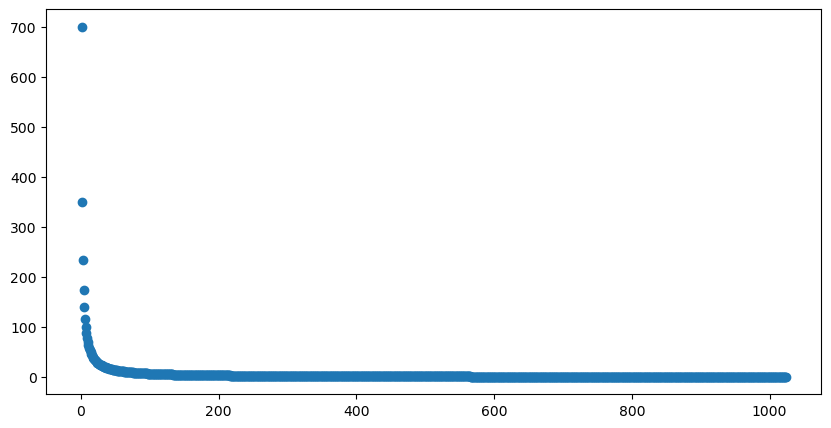

In [66]:
pywt.wavelist(kind='continuous')
scales = arange(1, 1025)
freqs = pywt.scale2frequency('cgau8', scales) / sampint
fig, ax = subplots(1, figsize=(10, 5))
ax.scatter(scales, freqs)

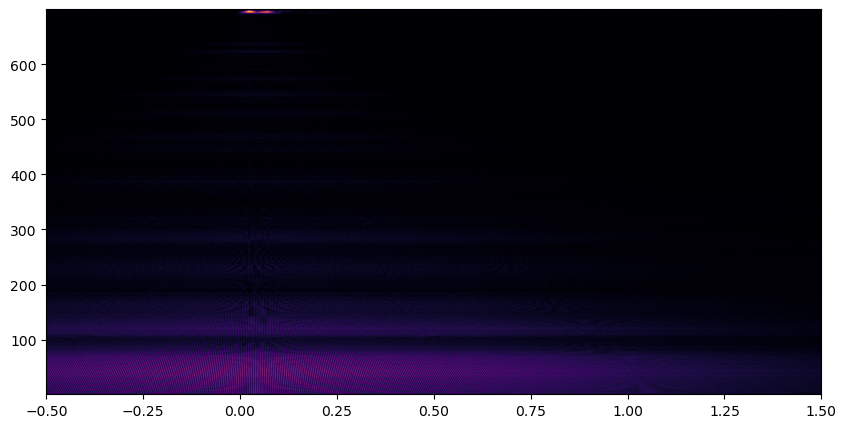

In [67]:
cwtmatr, freqs = pywt.cwt(data_z, scales, 'cgau8', sampling_period=sampint)
fig, ax = subplots(1, figsize=(10, 5))
ax.imshow(abs(cwtmatr), extent=[timeax[0], timeax[-1], freqs[-1], freqs[0]], aspect='auto', cmap='inferno', origin='upper')
